In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [2]:
# Model setup
nx = ny = 50
nt = 2000

alpha = 2.0 # diffusion coefficient
delta = 1.0

delta_t = 0.25 *delta**2/alpha
gamma = delta_t * alpha/delta**2 # this would be equal to the constant above

print(delta_t)

0.125


In [3]:
# finite difference scheme for diffusion equation
def advance_sol(theta):
    for k in range(0,nt-1):
        for i in range(1,nx-1):
            for j in range(1,ny-1):
                theta[k+1,i,j]=theta[k,i,j]+gamma*(theta[k,i-1,j]+theta[k,i+1,j]+theta[k,i,j-1]+theta[k,i,j+1]-4*theta[k,i,j])
    return theta


In [4]:
# plot solution at time step k
def plot_solution(theta_k, k):
    
    # Clear the current plot figure
    plt.clf()

    plt.title(f"Temperature at t = {k*delta_t:.3f} unit time",fontsize=24)
    plt.xlabel("i",fontsize=28)
    plt.ylabel("j",fontsize=28)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)

    # Plotting theta_k (theta at time-step k)
    #plt.pcolormesh(theta_k, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.contourf(theta_k.T, levels=[1,10,30,50,70,90,99],cmap=plt.cm.jet)
    cbar=plt.colorbar()
    cbar.ax.tick_params(labelsize=20)

    return plt

# utility to append to animation
def animate(k):
    plot_solution(theta[k], k)

2D heat equation solver
Done!


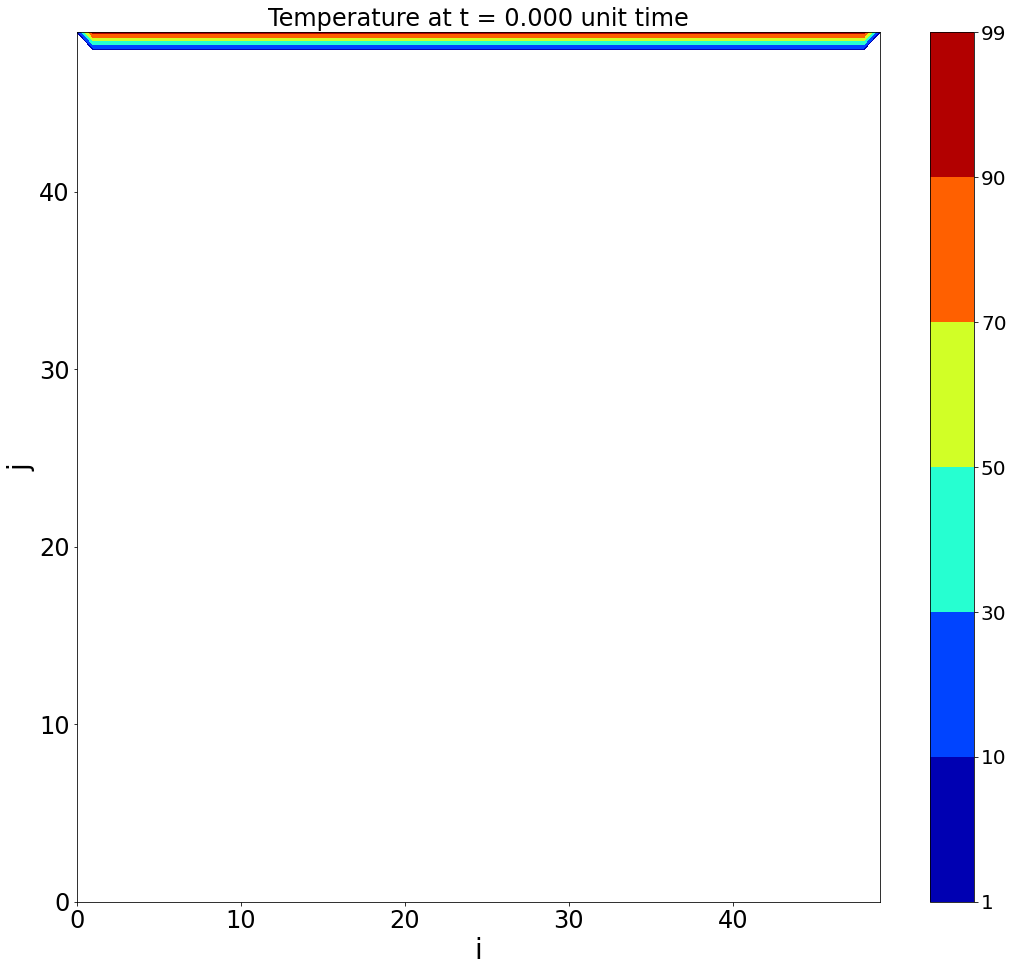

In [5]:
print("2D heat equation solver")
# Initialize solution: the grid of u(k, i, j)
theta=np.empty((nt, nx, ny))

# Initial condition everywhere inside the grid
theta_initial = 0
theta.fill(theta_initial)

# Boundary conditions
theta_top, theta_bottom = 100.0, 0.0
theta_left, theta_right = 0.0, 0.0

# Set the boundary conditions
theta[:, :, ny-1] = theta_top
theta[:, :,    0] = theta_bottom
theta[:, 0,   1:] = theta_left
theta[:, nx-1, 1:] = theta_right

# Calculate 
theta = advance_sol(theta)

# create animation
fig1 = plt.figure(figsize=(18,16))
anim = animation.FuncAnimation(fig1, animate, interval=1, frames=nt, repeat=False)
anim.save("heat_equation_solution_amador_2.mp4")

print("Done!")